# Exam's Project - Salary Data

## Cleaning And Validating The Salary Data

## Practical Exam: Career Atlas Inc.
Career Atlas Inc. provides salary insights to help companies benchmark compensation and guide job seekers in making informed career decisions. Recently, there have been inconsistencies in the reported salary data. Your team is tasked with cleaning and analyzing a dataset containing job salary details to support a reliable salary trend report.

## Instructions
You should start with the dataset: ds_salaries_dirty.csv.


Submit your work as a notebook (.ipynb) with code and  markdown cells explaining your process, decisions, and findings. This is just as important as your code.


When you're done, upload your notebook using this submission link
Deadline: 18/06/2025

* **Task 1**: Clean and Validate the Salary Data
Start by examining and cleaning the dataset. Some records contain missing or inconsistent values.
You should start with the data in the file "ds_salaries_dirty.csv".


Your output should be a DataFrame named clean_salaries.


* ### Apply the following rules:
Column Name
Criteria
work_year
Integer. Year the salary was reported. Must not be missing.
experience_level
Categorical. One of 'EN', 'MI', 'SE', 'EX'. Replace missing/invalid with 'EN'.
employment_type
Categorical. One of 'FT', 'PT', 'CT', 'FL'. Replace missing values with 'FT'.
job_title
String. Remove entries with less than 3 characters.
salary_in_usd
Numeric. Replace any values below 10,000 or above 1,000,000 with median.
company_location
Should be a valid 2-letter country code. Replace missing with 'US'.
company_size
One of 'S', 'M', 'L'. Replace missing or invalid with 'M'.


* **Task 2: Salary Trends by Experience**
Investigate how experience level affects average salary across employment types.
Group the data by experience_level and employment_type, and note observations in markdown.


Compute average salary_in_usd.


Your result should be a DataFrame named salary_trends and
 Notes stating your findings in markdown

* **Task 3: Remote Work Analysis**
Analyze and discuss the effect of remote work on salaries.
Compare average salaries between remote (remote_ratio = 100) and non-remote (remote_ratio = 0) roles.


Output should be a DataFrame named remote_salary_comparison with two rows:


Remote
On-site


In [1]:
# First import the python library pandas 
import pandas as pd

In [2]:
# import and read the data needed to be cleaned using pd.read_csv('data') 
clean_salaries = pd.read_csv('ds_salaries_dirty.csv')

In [3]:
# outputting the data
clean_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
3,2022,NaN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L


In [4]:
clean_salaries.shape

(100, 8)

In [5]:
clean_salaries.size

800

In [6]:
# Checking the summary of the dataframe
clean_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   work_year         100 non-null    int64  
 1   experience_level  90 non-null     object 
 2   employment_type   92 non-null     object 
 3   job_title         100 non-null    object 
 4   salary_in_usd     96 non-null     float64
 5   remote_ratio      100 non-null    int64  
 6   company_location  94 non-null     object 
 7   company_size      100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


##### Having checked the summary of the dataframe, it is noted that all values are in their right data type 
-All values in integer are in integers, 
-float values are in float, 
-and the string values are in string.

In [7]:
clean_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
2,2020,MI,CT,DS,173946.0,50,IN,L
3,2022,NaN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,9999999.0,100,NG,L


### Checking for And Replacing Missing Values

In [8]:
#Checking for missing values in the datasets 
clean_salaries.isna().sum()

work_year            0
experience_level    10
employment_type      8
job_title            0
salary_in_usd        4
remote_ratio         0
company_location     6
company_size         0
dtype: int64

##### After checking for the missing values it is being detected here that some columns have missing values,
-experience_level has 10 missing values to be replaced with 'EN' ,
-employment_type has 8 missing values to be replaced with 'FT', 
-company_location has 6 missing values to be replaced with 'US', 
-salary_in_usd has 4 missing values to be replaced with the median_value

In [9]:
# replacing the missing values in the column 'experience_level'  
clean_salaries['experience_level'].head(20)

0      SE
1      MI
2      MI
3     NaN
4      MI
5      MI
6     NaN
7      EX
8      MI
9      SE
10     EX
11     SE
12     EX
13     MI
14     SE
15     EX
16     EN
17     MI
18     EX
19     EN
Name: experience_level, dtype: object

In [10]:
clean_salaries['experience_level'] = clean_salaries['experience_level'].fillna('EN')

In [11]:
clean_salaries['experience_level'].head(20)

0     SE
1     MI
2     MI
3     EN
4     MI
5     MI
6     EN
7     EX
8     MI
9     SE
10    EX
11    SE
12    EX
13    MI
14    SE
15    EX
16    EN
17    MI
18    EX
19    EN
Name: experience_level, dtype: object

In [12]:
# replacing the missing value in the column 'empolyment_type' 
clean_salaries['employment_type'].tail(20)

80     FL
81    NaN
82     PT
83     CT
84     PT
85     CT
86     FT
87    NaN
88    NaN
89     FL
90     FT
91     CT
92     FT
93     PT
94     PT
95     FL
96     PT
97     CT
98     FT
99     FL
Name: employment_type, dtype: object

In [13]:
clean_salaries['employment_type'] = clean_salaries['employment_type'].fillna('FT')

In [14]:
clean_salaries['employment_type'].tail(20)

80    FL
81    FT
82    PT
83    CT
84    PT
85    CT
86    FT
87    FT
88    FT
89    FL
90    FT
91    CT
92    FT
93    PT
94    PT
95    FL
96    PT
97    CT
98    FT
99    FL
Name: employment_type, dtype: object

In [15]:
# replacing the missing value in the column 'company_location' 
clean_salaries['company_location'].head(20)

0      IN
1      IN
2      IN
3      DE
4      NG
5      GB
6      DE
7      IN
8      US
9      IN
10    NaN
11     IN
12     US
13     NG
14     IN
15    NaN
16     GB
17     GB
18     IN
19     NG
Name: company_location, dtype: object

In [16]:
clean_salaries['company_location'] = clean_salaries['company_location'].fillna('US')

In [17]:
clean_salaries['company_location'].head(20)

0     IN
1     IN
2     IN
3     DE
4     NG
5     GB
6     DE
7     IN
8     US
9     IN
10    US
11    IN
12    US
13    NG
14    IN
15    US
16    GB
17    GB
18    IN
19    NG
Name: company_location, dtype: object

In [18]:
# for the job_title, some titles are less than three character
# and according to instruction it should be removed i.e. removing such rows 
clean_salaries['job_title'].head(20)

0     Data Scientist
1     Data Scientist
2                 DS
3        ML Engineer
4        ML Engineer
5     Data Scientist
6      AI Specialist
7        ML Engineer
8                 DS
9        ML Engineer
10     AI Specialist
11      Data Analyst
12     AI Specialist
13      Data Analyst
14      Data Analyst
15                DS
16      Data Analyst
17    Data Scientist
18      Data Analyst
19       ML Engineer
Name: job_title, dtype: object

In [19]:
# removing the rows will require using the boolean indexing along with the .str.len method 
clean_salaries = clean_salaries[clean_salaries['job_title'].str.len()>=3]

In [20]:
clean_salaries['job_title'].head(20)

0     Data Scientist
1     Data Scientist
3        ML Engineer
4        ML Engineer
5     Data Scientist
6      AI Specialist
7        ML Engineer
9        ML Engineer
10     AI Specialist
11      Data Analyst
12     AI Specialist
13      Data Analyst
14      Data Analyst
16      Data Analyst
17    Data Scientist
18      Data Analyst
19       ML Engineer
20     AI Specialist
21    Data Scientist
22     AI Specialist
Name: job_title, dtype: object

### replacing missing values and outliers in salary_in_usd column

In [21]:
# first start by filtering the dataset into a one-dimensional dataframe, i.e. a series 
clean_salaries['salary_in_usd'].head(50)

0       42183.0
1      190371.0
3      146336.0
4     9999999.0
5       35539.0
6      214423.0
7      222339.0
9     5000000.0
10     163629.0
11      68360.0
12     243090.0
13     163272.0
14     229569.0
16      51357.0
17     149121.0
18     107505.0
19      32869.0
20     222207.0
21      80108.0
22     142296.0
23     124179.0
24          NaN
25      68467.0
26      53328.0
27     121412.0
28     247903.0
29     165059.0
30          NaN
31     183471.0
32     158391.0
33     207286.0
34     116416.0
35     100271.0
36      74064.0
37     231163.0
38     137450.0
39     201890.0
41      49830.0
42     178501.0
43     167965.0
44     146381.0
45     240981.0
46      77333.0
47     164508.0
48         50.0
49     106213.0
50     166967.0
51     180810.0
52      60746.0
53      79377.0
Name: salary_in_usd, dtype: float64

1. After studying the series it is dectected that there are some missing values,
2. Also the salary distribution doesn't seem to fit the overall distributin or spread of the data, which is known as outliers i.e. we are going to fill in the missing values and also replace the outliers with the median_value as instructed.

In [22]:
# first we calculate the median value without the missing values and the outliers from the salary_in_usd 
# a new variable is formed called the verified salary, i.e. salary without the missing values and outliers in other to get an unbiased median value. 
valid_salaries = clean_salaries.loc[
    (clean_salaries['salary_in_usd'].notnull()) &   # .notnull here stands for salaries that are not in the NAN value
    (clean_salaries['salary_in_usd'] >= 10000) & 
    (clean_salaries['salary_in_usd'] <= 1000000), 'salary_in_usd'
]

In [23]:
median_value = valid_salaries.median()

In [24]:
median_value

151570.0

In [25]:
# filling the missing values with the median value(salary) calculated. 
clean_salaries['salary_in_usd'] = clean_salaries['salary_in_usd'].fillna(value=median_value)

In [26]:
 # identifying outliers 
salary_outliers_low = clean_salaries['salary_in_usd'] < 10000
salary_outliers_high = clean_salaries['salary_in_usd'] > 1000000

In [27]:
# replacing outliers with median value
clean_salaries.loc[salary_outliers_low, 'salary_in_usd'] = median_value
clean_salaries.loc[salary_outliers_high, 'salary_in_usd'] = median_value

In [28]:
clean_salaries['salary_in_usd'].head(50)

0      42183.0
1     190371.0
3     146336.0
4     151570.0
5      35539.0
6     214423.0
7     222339.0
9     151570.0
10    163629.0
11     68360.0
12    243090.0
13    163272.0
14    229569.0
16     51357.0
17    149121.0
18    107505.0
19     32869.0
20    222207.0
21     80108.0
22    142296.0
23    124179.0
24    151570.0
25     68467.0
26     53328.0
27    121412.0
28    247903.0
29    165059.0
30    151570.0
31    183471.0
32    158391.0
33    207286.0
34    116416.0
35    100271.0
36     74064.0
37    231163.0
38    137450.0
39    201890.0
41     49830.0
42    178501.0
43    167965.0
44    146381.0
45    240981.0
46     77333.0
47    164508.0
48    151570.0
49    106213.0
50    166967.0
51    180810.0
52     60746.0
53     79377.0
Name: salary_in_usd, dtype: float64

### Task 1 summary - Data cleaning and validation. 
-All missing values has been replaced with the given entries, 
 -Job titles with less than 3 characters removed to maintain meaningful job descriptions. 
-Salary_in_usd: Calculated the median salary from valid data (excluding missing values and outliers). Then replaced missing salary values and outliers (<10,000 and >1,000,000) with this median to reduce bias. Now we check for any missing value, if non then we now have a clean data below.

In [29]:
# checking if there are still any missing values 
clean_salaries.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_location    0
company_size        0
dtype: int64

In [30]:
# checking if there are still any missing values 
clean_salaries.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2022,SE,CT,Data Scientist,42183.0,50,IN,L
1,2023,MI,FL,Data Scientist,190371.0,100,IN,S
3,2022,EN,FT,ML Engineer,146336.0,50,DE,S
4,2022,MI,FL,ML Engineer,151570.0,100,NG,L
5,2023,MI,FT,Data Scientist,35539.0,50,GB,S
6,2020,EN,FL,AI Specialist,214423.0,100,DE,XL
7,2020,EX,FL,ML Engineer,222339.0,50,IN,S
9,2021,SE,FT,ML Engineer,151570.0,100,IN,M
10,2022,EX,CT,AI Specialist,163629.0,50,US,S
11,2022,SE,CT,Data Analyst,68360.0,50,IN,M


# Task 2 - Salary Trend By Experience

 Grouping data by experience_level and employment_type: We're grouping by both experience level and employment type. This shows how these two factors together impact salary trends.

In [31]:
# grouping the data 
salary_trends = clean_salaries.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

In [32]:
# renaming the column: This line renames the column salary_in_usd to average_salary_usd to make it clearer that the column contains average salaries.
salary_trends = salary_trends.rename(columns={'salary_in_usd': 'average_salary_usd'})

In [33]:
salary_trends

,experience_level,employment_type,average_salary_usd
0,EN,CT,91934.200000
1,EN,FL,160093.333333
2,EN,FT,132460.333333
3,EN,PT,164572.857143
4,EX,CT,166817.200000
5,EX,FL,163361.250000
6,EX,FT,175002.625000
7,EX,PT,110018.500000
8,MI,CT,170696.750000
9,MI,FL,127798.000000


##### A Barplot to show the salary trend of how experience level affect salary across employment types - a bonus view

In [34]:
import seaborn as sns

<Axes: xlabel='experience_level', ylabel='average_salary_usd'>

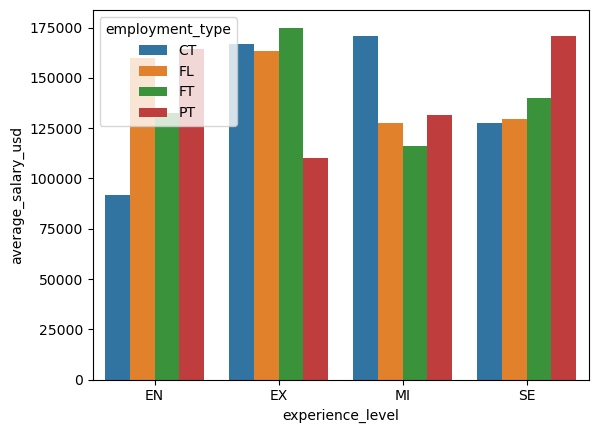

In [35]:
sns.barplot(data=salary_trends, x='experience_level', y='average_salary_usd', hue='employment_type')

### Salary Trend Observations 
 Entry-Level Insights: Entry-level roles show diverse salary ranges. Part-time and freelance can surprisingly offer higher pay than full-time or contract positions.

-Executive Compensation: Executive roles generally command the highest salaries. Full-time and contract positions lead in compensation.

-Mid-Level Observations: Mid-level salaries in contract roles stand out, but full-time pay is lower compared to entry-level, showing varied compensation patterns.

-Senior-Level Highlights: Senior-level employees see top salaries in part-time roles, indicating lucrative opportunities for experienced individuals in part-time work.

-General Trend: Full-time roles are competitive, but part-time and freelance positions can exceed full-time salaries, suggesting dynamic pay structures based on employment type and experience.

#### Overall, both experience level and employment type significantly shape salary, indicating a difference in compensation landscape.


## Task 3: Remote Work Analysis


Comparing the salaries between Remote workers and Onsite workers.


In [38]:
# filtering the data for each worktype and calculating the mean.
# calculating for the remote worktype
remote_avg_salary = clean_salaries[clean_salaries['remote_ratio']== 100]['salary_in_usd'].mean()
#calculating for the on-site worktype
onsite_avg_salary = clean_salaries[clean_salaries['remote_ratio']== 0]['salary_in_usd'].mean()

In [40]:
print(remote_avg_salary)
print(onsite_avg_salary)

144803.57142857142
153092.25925925927


In [43]:
# creating comparism between both worktypes using dataframe 
remote_salary_comparison = pd.DataFrame({'Work Type' : ['Remote', 'On-site'], 'Average Salary USD' : [round(remote_avg_salary, 2), round(onsite_avg_salary, 2)]})

In [44]:
remote_salary_comparison

,Work Type,Average Salary USD
0,Remote,144803.57
1,On-site,153092.26


### Insights on the Remote Salary Comparison
This insight show a differnce of 8,288.69usd meaning that the onsite worker earn the difference of up to  8,300usd more than a remote worker, this difference may reflect factors like location costs and job roles. Also compensation trends vary, but many companies may adjust pay based on work location, education level, and other factors.